In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241030_135421.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241030_135421.braidz using pyarrow


In [3]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0           246   117109  1.730293e+09 -0.138519  0.156647 -0.006556   
 1           246   117110  1.730293e+09 -0.138543  0.156649 -0.006610   
 2           246   117111  1.730293e+09 -0.138519  0.156632 -0.006573   
 3           246   117112  1.730293e+09 -0.138506  0.156631 -0.006549   
 4           246   117113  1.730293e+09 -0.138508  0.156688 -0.006497   
 ...         ...      ...           ...       ...       ...       ...   
 3998296   35397  8123995  1.730373e+09  0.116178  0.044983  0.268999   
 3998297   35397  8123996  1.730373e+09  0.118887  0.042914  0.264836   
 3998298   35397  8123997  1.730373e+09  0.121597  0.040844  0.260672   
 3998299   35397  8123998  1.730373e+09  0.116064  0.001883  0.267329   
 3998300   35397  8123999  1.730373e+09  0.117136 -0.004850  0.264712   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.000149 -0.002585 -0.002876  2.393382e-07

In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])

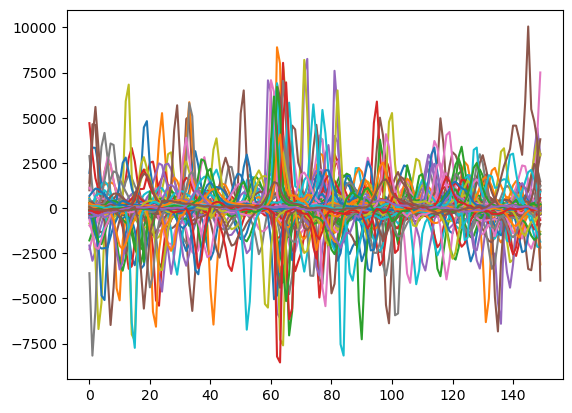

In [5]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

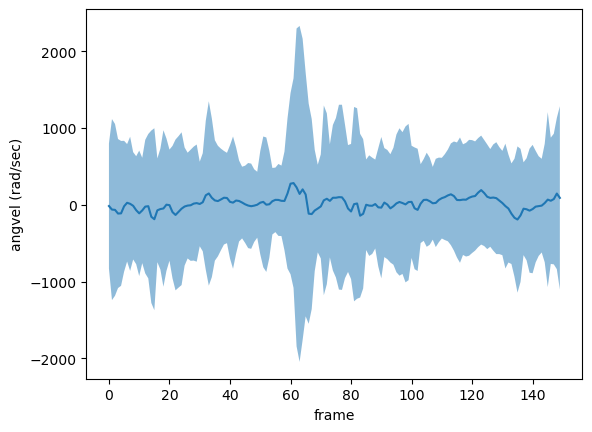

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

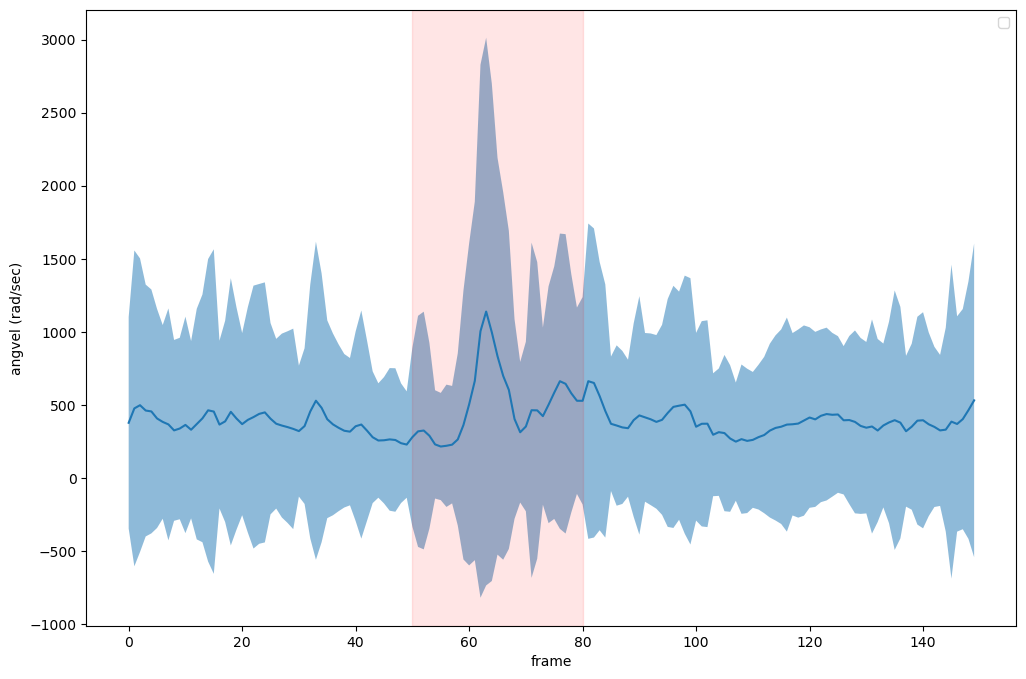

In [7]:
# Creating the plot with a specific figure size
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

# Plotting data and setting labels
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.1)
ax.legend()
plt.show()

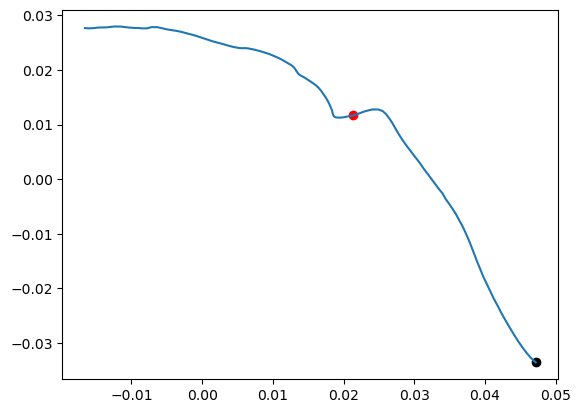

In [8]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

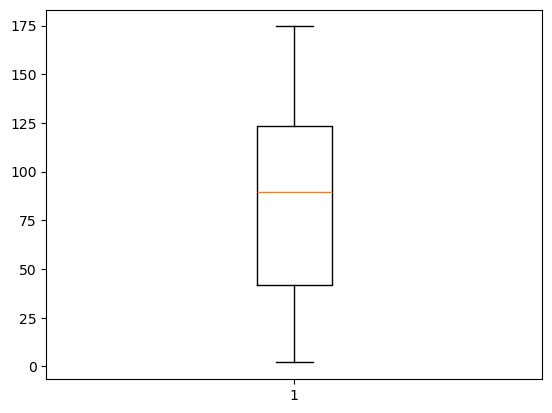

In [9]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()